In [1]:
import numpy as np
import h5py
import hdf5plugin

# Reading Snapshots
# snapshot name
snapshot = 'Data/Sims/IllustrisTNG/L25n256/CV/CV_0/snap_033.hdf5'

# open file
f = h5py.File(snapshot, 'r')

# read different attributes of the header
BoxSize      = f['Header'].attrs[u'BoxSize']/1e3 #Mpc/h
redshift     = f['Header'].attrs[u'Redshift']
h            = f['Header'].attrs[u'HubbleParam']
Masses       = f['Header'].attrs[u'MassTable']*1e10 #Msun/h
Np           = f['Header'].attrs[u'NumPart_Total']
Omega_m      = f['Header'].attrs[u'Omega0']
Omega_L      = f['Header'].attrs[u'OmegaLambda']
Omega_b      = f['Header'].attrs[u'OmegaBaryon']
scale_factor = f['Header'].attrs[u'Time'] #scale factor

# read gas positions
pos_g = f['PartType0/Coordinates'][:]/1e3  #positions in Mpc/h

# read dark matter velocities; need to multiply by sqrt(a) to get peculiar velocities
vel_c = f['PartType1/Velocities'][:]*np.sqrt(scale_factor) #velocities in km/s

# read star masses
mass_s = f['PartType4/Masses'][:]*1e10  #Masses in Msun/h
metal_s = f['PartType4/GFM_Metallicity'][:]

# read black hole positions and the gravitational potential at their locations
pos_bh       = f['PartType5/Coordinates'][:]/1e3  #positions in Mpc/h
potential_bh = f['PartType5/Potential'][:]/scale_factor #potential in (km/s)^2


# close file
f.close()

In [2]:
redshift

2.220446049250313e-16

In [3]:
mass_s.shape

(636474,)

In [4]:
metal_s.shape

(636474,)

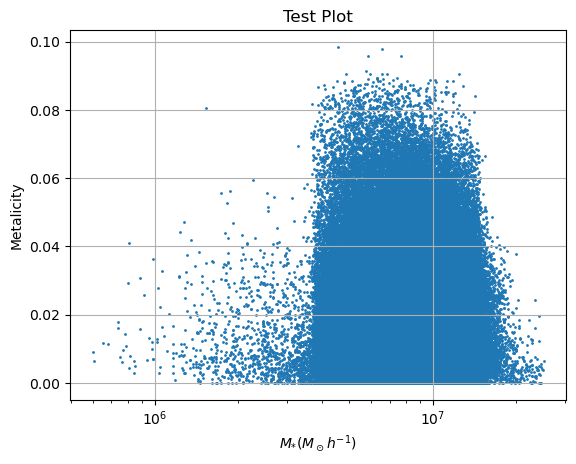

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(mass_s, metal_s, s=1)
ax.set_xscale("log");

ax.set(xlabel='$M_{*} (M{_\odot} h^{-1}$)', ylabel='Metalicity',
       title='Test Plot')
ax.grid()

#fig.savefig("test.png")
plt.show()

In [6]:
# Reading Subhalos (Galaxies)

import pandas as pd
f_catalog = '/home/jovyan/Data/Sims/IllustrisTNG/L25n256/CV/CV_0/fof_subhalo_tab_033.hdf5'
# open file
f = h5py.File(f_catalog, 'r')
print(f.keys())

<KeysViewHDF5 ['Config', 'Group', 'Header', 'IDs', 'Parameters', 'Subhalo']>


In [7]:
f['Group'].keys()

<KeysViewHDF5 ['GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200']>

In [8]:
f['Subhalo'].keys()

<KeysViewHDF5 ['SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalFractionsMaxRad', 'SubhaloStarMetallicity', 'SubhaloStarMetallicityHalfRad', '

In [9]:
df_group = pd.DataFrame(np.array(h5py.File(f_catalog)['Group']['GroupMassType']))
df_galaxies = pd.DataFrame(np.array(h5py.File(f_catalog)['Subhalo']['SubhaloMassType']))

#PartType0 - GAS
#PartType1 - DM
#PartType2 - (unused)
#PartType3 - TRACERS
#PartType4 - STARS & WIND PARTICLES
#PartType5 - BLACK HOLES

In [10]:
df_galaxies = df_galaxies.rename(columns={0: "gas", 1: "dm", 2: "not used", 3:"tracers", 4:"stars",5:"BHs"})
df_galaxies

,gas,dm,not used,tracers,stars,BHs
0,631.255737,4307.957031,0.0,0.0,42.678936,0.358929
1,0.984040,27.022781,0.0,0.0,2.398532,0.006129
2,0.676999,21.897211,0.0,0.0,1.551164,0.007869
3,0.672582,19.859961,0.0,0.0,1.581151,0.009738
4,1.391514,15.506470,0.0,0.0,0.151477,0.002269
...,...,...,...,...,...,...
17171,0.000000,0.175178,0.0,0.0,0.000000,0.000000
17172,0.000000,0.168690,0.0,0.0,0.000000,0.000000
17173,0.000000,0.162202,0.0,0.0,0.000000,0.000000
17174,0.000676,0.155714,0.0,0.0,0.000000,0.000000


In [11]:
df_galaxies['stars_Msun_h'] = df_galaxies['stars']*1e10
df_galaxies = df_galaxies[df_galaxies.stars != 0]
df_galaxies

,gas,dm,not used,tracers,stars,BHs,stars_Msun_h
0,631.255737,4307.957031,0.0,0.0,42.678936,0.358929,4.267894e+11
1,0.984040,27.022781,0.0,0.0,2.398532,0.006129,2.398532e+10
2,0.676999,21.897211,0.0,0.0,1.551164,0.007869,1.551164e+10
3,0.672582,19.859961,0.0,0.0,1.581151,0.009738,1.581151e+10
4,1.391514,15.506470,0.0,0.0,0.151477,0.002269,1.514770e+09
...,...,...,...,...,...,...,...
11801,0.000000,0.272499,0.0,0.0,0.001144,0.000000,1.144040e+07
13567,0.000000,0.240058,0.0,0.0,0.001042,0.000000,1.042136e+07
15125,0.000000,0.175178,0.0,0.0,0.001003,0.000000,1.002853e+07
15904,0.000000,0.149225,0.0,0.0,0.001166,0.000000,1.165957e+07


In [12]:
df_galaxies['stars_Msun_h']

0        4.267894e+11
1        2.398532e+10
2        1.551164e+10
3        1.581151e+10
4        1.514770e+09
             ...     
11801    1.144040e+07
13567    1.042136e+07
15125    1.002853e+07
15904    1.165957e+07
16259    9.895896e+06
Name: stars_Msun_h, Length: 2424, dtype: float32

In [13]:
df_galaxies['stars_Msun_h'].max()

426789370000.0

volume = 25*3
max_mass = df_galaxies['stars_Msun_h'].max()
min_mass = df_galaxies['stars_Msun_h'].min()

# Create logarithmically spaced bins
bins = np.logspace(np.log10(min_mass), np.log10(max_mass), num=10)
bins

# Apply the calc_df function to the 'mstar' column and create a new 'phi' column
df_galaxies['Phi'] = df_galaxies['stars_Msun_h'].apply(lambda x: calc_df(x, volume, bins))
df_galaxies['Phi']

In [14]:
df_group = df_group.rename(columns={0: "gas", 1: "dm", 2: "not used", 3:"tracers", 4:"stars",5:"BHs"})
df_group

,gas,dm,not used,tracers,stars,BHs
0,637.216125,4608.483887,0.0,0.0,57.036472,0.420813
1,219.819885,2213.045654,0.0,0.0,30.194454,0.179985
2,202.084335,2114.342773,0.0,0.0,29.153549,0.187899
3,193.432602,1793.086426,0.0,0.0,34.853767,0.123528
4,171.580017,1903.532715,0.0,0.0,24.140736,0.202295
...,...,...,...,...,...,...
20126,0.008822,0.162202,0.0,0.0,0.000000,0.000000
20127,0.010556,0.155714,0.0,0.0,0.000000,0.000000
20128,0.005132,0.175178,0.0,0.0,0.000000,0.000000
20129,0.014180,0.123273,0.0,0.0,0.000000,0.000000


In [15]:
# Sum of the individual masses of every particle/cell, of all types, in this group.
mass_group = f['Group/GroupMass'][:]*1e10         #masses in Msun/h
mass_group 


array([5.3031572e+13, 2.4632401e+13, 2.3457685e+13, ..., 1.8030922e+09,
       1.3745317e+09, 4.8516278e+08], dtype=float32)

In [16]:
# Sum of the individual masses of every particle/cell, split into the six different types, in this group. Note: Wind phase cells are counted as gas (type 0) for GroupMassType.
mass_gType = f['Group/GroupMassType'][:]*1e10         #masses in Msun/h
mass_gType

array([[6.3721612e+12, 4.6084840e+13, 0.0000000e+00, 0.0000000e+00,
        5.7036472e+11, 4.2081324e+09],
       [2.1981988e+12, 2.2130457e+13, 0.0000000e+00, 0.0000000e+00,
        3.0194454e+11, 1.7998542e+09],
       [2.0208433e+12, 2.1143428e+13, 0.0000000e+00, 0.0000000e+00,
        2.9153549e+11, 1.8789926e+09],
       ...,
       [5.1315316e+07, 1.7517769e+09, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4179973e+08, 1.2327319e+09, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.2028214e+08, 6.4880628e+07, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [17]:
mass_gType.shape

(20131, 6)

In [18]:
galaxymass = f['Subhalo']['SubhaloMassType'][:,4]*1e10

In [19]:
galaxymass

array([4.2678937e+11, 2.3985320e+10, 1.5511638e+10, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [20]:
type(galaxymass)

numpy.ndarray

In [21]:
galaxymass = galaxymass[galaxymass != 0]
galaxymass

array([4.2678937e+11, 2.3985320e+10, 1.5511638e+10, ..., 1.0028534e+07,
       1.1659573e+07, 9.8958960e+06], dtype=float32)

In [22]:
# now I think I have some masses of galaxies, we could try to plot them?

def calc_df(mstar, volume, massBinLimits):

    hist, dummy = np.histogram(np.log10(mstar), bins = massBinLimits)
    hist = np.float64(hist)
    phi = (hist / volume) / (massBinLimits[1] - massBinLimits[0])

    # p = 0.95
    # phi_sigma = np.array([scipy.stats.chi2.ppf((1.-p)/2.,2*hist)/2.,
    #                       scipy.stats.chi2.ppf(p+(1.-p)/2.,2*(hist+1))/2.])

    # phi_sigma = (phi_sigma / volume) / (massBinLimits[1] - massBinLimits[0])

    phi_sigma = (np.sqrt(hist) / volume) /\
                (massBinLimits[1] - massBinLimits[0]) # Poisson errors

    return phi, phi_sigma, hist

In [23]:
min_gmass = galaxymass.min()
max_gmass = galaxymass.max()

bins2 = np.logspace(np.log10(min_gmass), np.log10(max_gmass), num=10)
bins2


array([1.73918761e+06, 6.90590464e+06, 2.74217219e+07, 1.08885203e+08,
       4.32357515e+08, 1.71678993e+09, 6.81696874e+09, 2.70685784e+10,
       1.07482954e+11, 4.26789511e+11])

In [24]:
volume = 25**3
volume #Mpc ^3 h^-3

15625

In [25]:
print("Number of NaN values:", np.sum(np.isnan(galaxymass)))
print("Number of infinite values:", np.sum(np.isinf(galaxymass)))


Number of NaN values: 0
Number of infinite values: 0


In [26]:
hist, dummy = np.histogram(np.log10(galaxymass), bins = bins2)
print('hist: ',  hist)
print('dummy: ',  dummy)

hist:  [0 0 0 0 0 0 0 0 0]
dummy:  [1.73918761e+06 6.90590464e+06 2.74217219e+07 1.08885203e+08
 4.32357515e+08 1.71678993e+09 6.81696874e+09 2.70685784e+10
 1.07482954e+11 4.26789511e+11]


In [27]:
phi

NameError: name 'phi' is not defined

In [ ]:
phi_sigma

In [ ]:
hist

In [ ]:
def calculate_stellar_mass_function(mass, V, nbins):
    """
    Calculate the stellar mass function.

    Parameters:
        logM (array): Array of logarithmic stellar masses.
        V (float): Survey volume in Mpc^3.
        nbins (int): Number of bins for the histogram.

    Returns:
        Max (array): Mass axis.
        Phi (array): Normalized stellar mass function.
    """
    # Mass is in logs
    Phi, edg = np.histogram(logM, bins=nbins)  # Unnormalized histogram and bin edges
    dM = edg[1] - edg[0]  # Bin size
    Max = edg[:-1] + dM / 2.0  # Mass axis
    Phi = Phi / V / dM  # Normalize to volume and bin size

    return Max, Phi

In [ ]:
Max_033, Phi_033 = calculate_stellar_mass_function(galaxymass, volume, 1000)
print('Max_033: ', Max_033)
print('Phi_033: ', Phi_033)

In [ ]:

plt.clf()
#plt.xlim(0, np.max(Max))  # Adjust the limits as needed
plt.yscale('log')
plt.xscale('log')

plt.plot(galaxymass, Phi_033, linestyle='-', marker='+', markersize=5, color=np.random.rand(3,))#, label=label_033)

plt.legend(loc='upper right')  # Add a legend with label for the data

plt.title('Stellar Mass Function')  # Add a title to the plot
#plt.savefig('/Users/am/Documents/PhD/Main/CAMELS/SMF/plots/SMF_zs')